Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_percentage_error

### Working with Dataset

In [2]:
df = pd.read_csv('class (3).csv')
df.head()

,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,0.50,K,SI2,Excellent,Excellent,Excellent,61.4,55.0,5.10,5.12,3.14,990
1,0.50,E,VVS2,Excellent,Excellent,Very Good,61.9,60.0,5.06,5.09,3.14,3384
2,0.35,G,VS2,Excellent,Excellent,Excellent,63.0,55.0,4.47,4.51,2.83,1154
3,0.30,E,SI2,Excellent,Excellent,Excellent,63.2,57.0,4.24,4.27,2.69,886
4,0.30,F,VS2,Very Good,Very Good,Excellent,63.4,61.0,4.24,4.26,2.69,864


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67598 entries, 0 to 67597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   size               67598 non-null  float64
 1   color              67598 non-null  object 
 2   clarity            67598 non-null  object 
 3   cut                67598 non-null  object 
 4   symmetry           67598 non-null  object 
 5   polish             67598 non-null  object 
 6   depth_percent      67598 non-null  float64
 7   table_percent      67598 non-null  float64
 8   meas_length        67598 non-null  float64
 9   meas_width         67598 non-null  float64
 10  meas_depth         67598 non-null  float64
 11  total_sales_price  67598 non-null  int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 6.2+ MB


In [4]:
df.describe()

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,67598.000000,67598.000000,67598.000000,67598.000000,67598.000000,67598.000000,67598.000000
mean,0.504181,62.106799,57.793840,4.911646,4.943448,3.060767,2755.178393
std,0.306526,1.309775,1.853719,0.869997,0.875224,0.545834,3341.411466
min,0.150000,55.000000,0.000000,2.270000,3.420000,0.000000,242.000000
25%,0.300000,61.400000,56.000000,4.290000,4.310000,2.680000,898.000000
50%,0.400000,62.300000,58.000000,4.600000,4.640000,2.880000,1236.000000
75%,0.570000,62.800000,59.000000,5.290000,5.330000,3.290000,3208.000000
max,2.000000,66.500000,67.000000,8.180000,8.230000,6.860000,19996.000000


### Important!! Drop duplicates

In [5]:
df.drop_duplicates(inplace=True)

### Let's take a look at the distribution

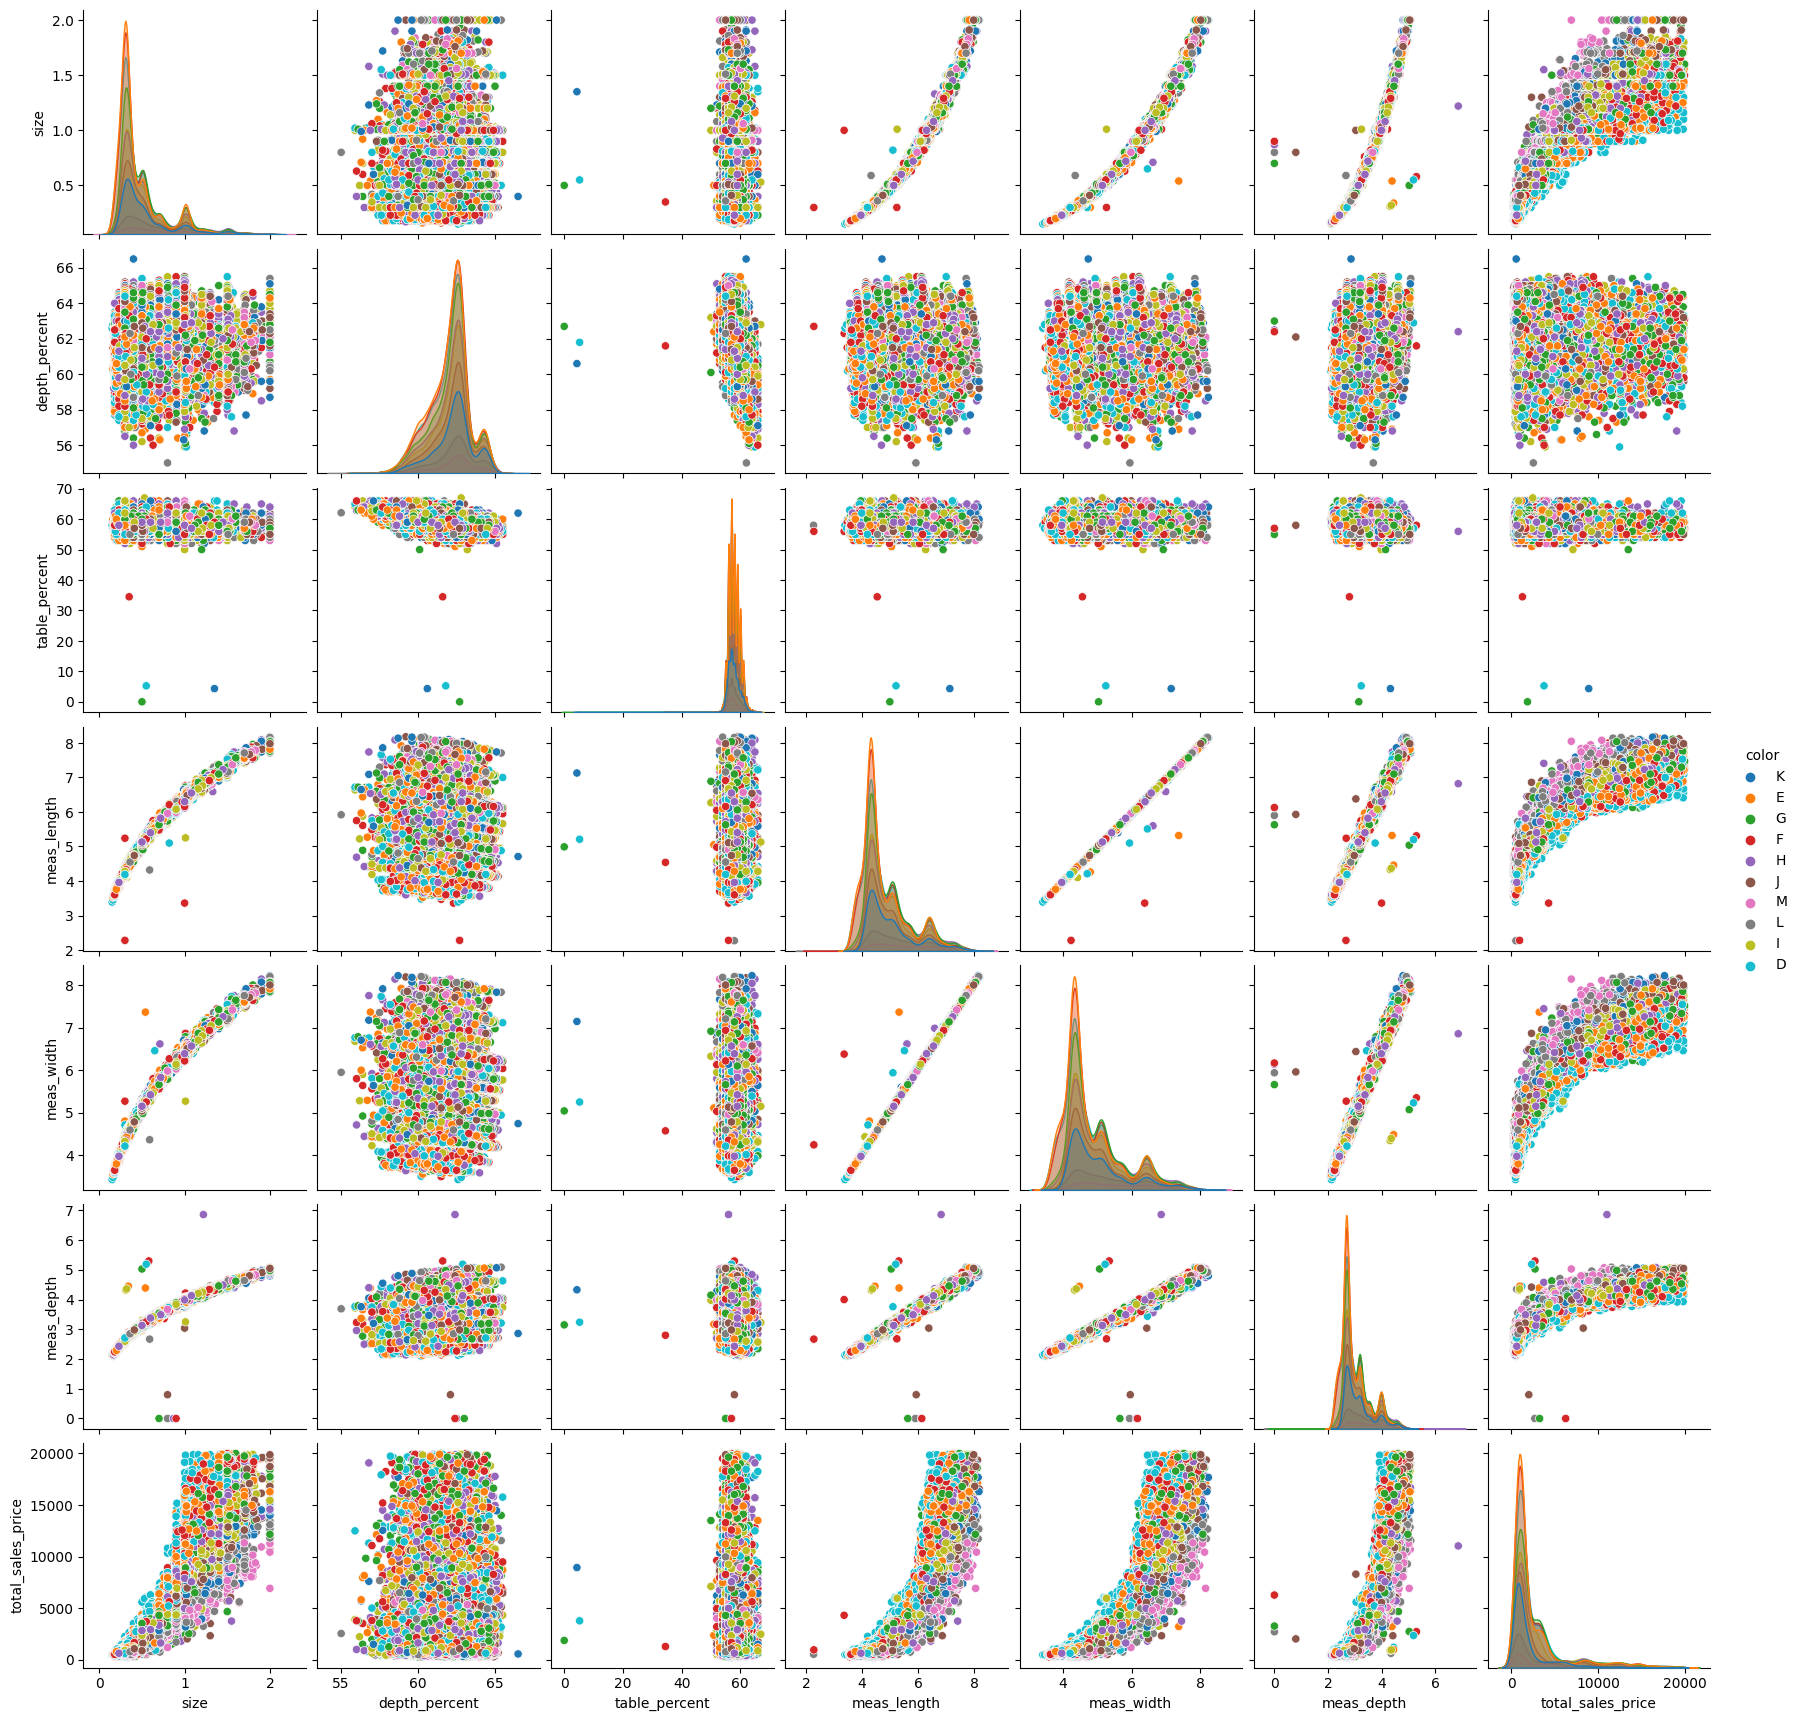

In [6]:
sns.pairplot(df, hue='color', diag_kind='kde')

<AxesSubplot: ylabel='Frequency'>

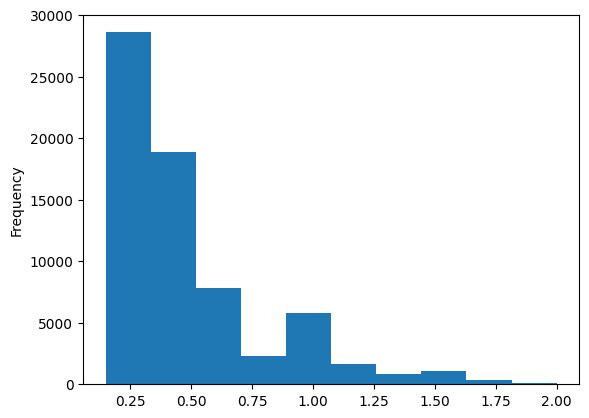

In [7]:
df['size'].plot(kind='hist')

### Working with NaN and categorical features (simple solution)

In [8]:
df.isna().sum()

size                 0
color                0
clarity              0
cut                  0
symmetry             0
polish               0
depth_percent        0
table_percent        0
meas_length          0
meas_width           0
meas_depth           0
total_sales_price    0
dtype: int64

In [9]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) #attention to 'handle_unknown'!

In [10]:
df['color'] = encoder.fit_transform(df[['color']])
df['clarity'] = encoder.fit_transform(df[['clarity']])
df['cut'] = encoder.fit_transform(df[['cut']])
df['symmetry'] = encoder.fit_transform(df[['symmetry']])
df['polish'] = encoder.fit_transform(df[['polish']])
df.head()

,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,0.50,7.0,5.0,0.0,0.0,0.0,61.4,55.0,5.10,5.12,3.14,990
1,0.50,1.0,9.0,0.0,0.0,1.0,61.9,60.0,5.06,5.09,3.14,3384
2,0.35,3.0,7.0,0.0,0.0,0.0,63.0,55.0,4.47,4.51,2.83,1154
3,0.30,1.0,5.0,0.0,0.0,0.0,63.2,57.0,4.24,4.27,2.69,886
4,0.30,2.0,7.0,1.0,1.0,0.0,63.4,61.0,4.24,4.26,2.69,864


## Let's create our first ML-model (6 magic rows)

In [11]:
X = df.drop(columns='total_sales_price')
y = df['total_sales_price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
lr.predict(X_test)

array([8916.08346191, 1931.96198589, 1255.84398926, ...,  719.31865215,
        835.9398413 ,  751.12755998])

### Choose the best metric and look at the baseline result we've already gotten

In [16]:
y_pred = lr.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred)

0.3731813592893507

### Interesting observation

In [17]:
np.where(y_pred<0)

(array([   12,    33,    41, ..., 20132, 20178, 20216], dtype=int64),)

In [18]:
y_pred = np.clip(y_pred, 0, np.inf)

In [19]:
mean_absolute_percentage_error(y_test, y_pred)

0.3405036592526408

## Error graph

In [20]:
def plot_2_error(y_true, y_pred):

    mape = mean_absolute_percentage_error(y_true, y_pred) * 100


    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Scatter Plot')
    plt.title('Scatter Plot of Predicted vs. True Values')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)


    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Prediction Line')


    plt.legend()
    print(f'MAPE: {mape:.2f}%')


    plt.show()

MAPE: 34.05%


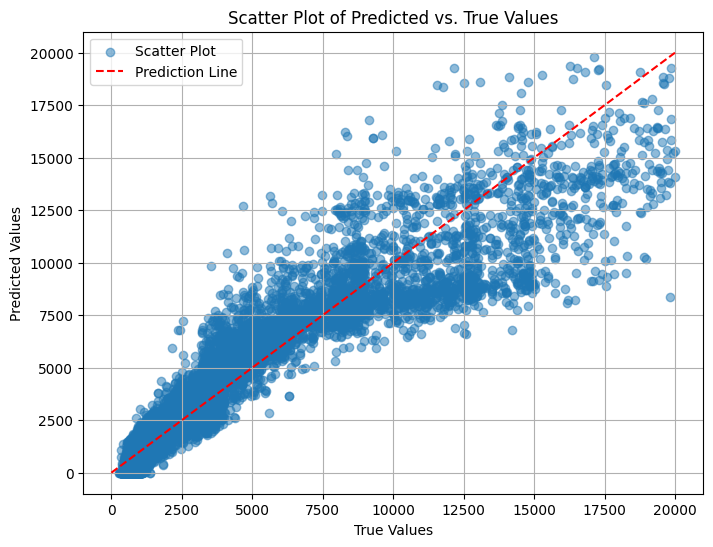

In [21]:
plot_2_error(y_test, y_pred)

# Thanks for watching!
# Homework:
1. try to understand why we've got negative values in our prediction;
2. make a model (only linear models can be used) that will work better with this dataset and won't get negative prediction values;
3. never forget to chilling!!!